<a href="https://colab.research.google.com/github/pandasorceress/DataScienceProjects/blob/main/SVHN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive #import google drive
drive.mount('/content/drive') #mount drive for file access

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
#importing all packages I need or may need for the work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import tensorflow as tf
import keras
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    auc,
)
#import what I need from TF and Keras
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization)
from tensorflow.keras.layers import (Activation, Dense)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers


**Let us check the version of tensorflow.**

In [ ]:
print(tf.version) #checking version and displaying
#We find it is calling v2

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
#I will assign the file to a variable for easier access and load it
h5data = ('/content/drive/MyDrive/Deep Learning/SVHN_single_grey1.h5')
h5data = h5py.File(h5data, 'r') #reading file
#let's load the keys of the dataset
h5data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
#now I need to split the dataset into training and testing data using the keys above
X_train = h5data['X_train'][:] #x training data
y_train_o = h5data['y_train'][:] #y training data
#now I need the validation data assigned
X_val = h5data['X_val'][:] #x validation data
y_val_o = h5data['y_val'][:] #y validation data
#next I will get the test data assigned
X_test = h5data['X_test'][:] #x test data
y_test_o = h5data['y_test'][:] #y test data

In [ ]:
#since I have assigned all the data to variables and split up test/train/validation data, I can close the file now to stop running it
h5data.close()

Check the number of images in the training and the testing dataset.

In [ ]:
#let's check the data by displaying it and cfhecking its shape
print('Training Data', X_train.shape, y_train_o.shape)
print('Validation Data', X_val.shape, y_val_o.shape)
print('Testing Data', X_test.shape, y_test_o.shape)

Training Data (42000, 32, 32) (42000,)
Validation Data (60000, 32, 32) (60000,)
Testing Data (18000, 32, 32) (18000,)


In [ ]:
#I also want to check for unique labels now, because I need to understand my data best I can before diving into visualization
print('Unique labels in y_train:', np.unique(y_train_o))
print('Unique labels in y_val:', np.unique(y_val_o))
print('Unique labels in y_test:', np.unique(y_test_o))
#10 unique labels rane 0:9 inclusive

Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_val: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


**Observation:**

So, what we know currently: Training Data has 42,000 pieces of data (images), Validation Data has 60,000, and Testing Data has 18,000.
Each set actually has the same size of 32*32 for the images.
I also found that I havew 10 unique classifiers for the data
0,1,2,3,4,5,6,7,8,9

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

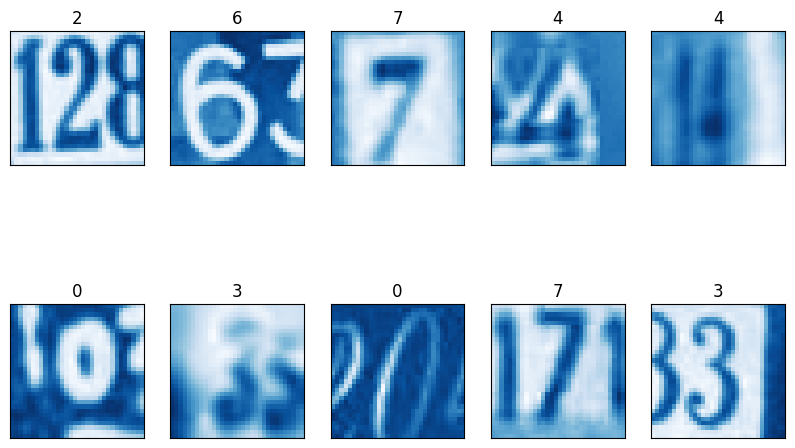

In [ ]:
#Visualizing the first 10 images of X_train
plt.figure(figsize=(10, 6.5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='Blues')
    plt.title(y_train_o[i])
    plt.xticks([])
    plt.yticks([])

In [ ]:
print('Label for each of the above image: %s' % (y_train_o[0 : 10])) #printing the first 10 labels for training data

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


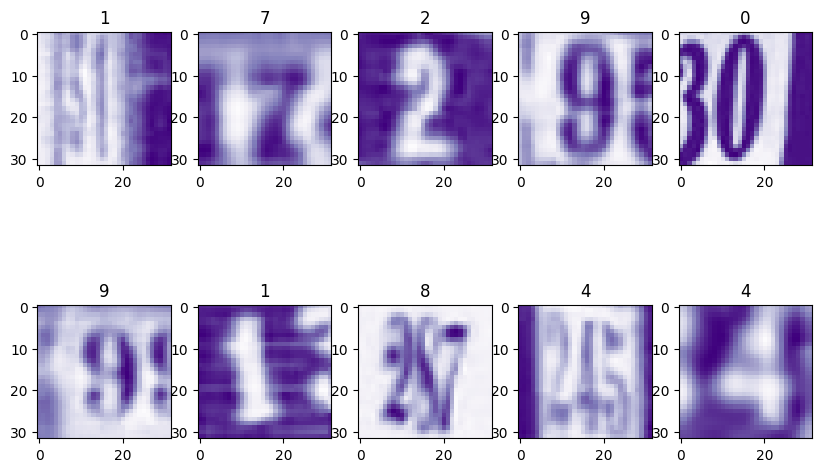

In [ ]:
#Let's visualize the first 10 images of test with y_train_o
plt.figure(figsize=(10, 6.5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap='Purples')
    plt.title(y_test_o[i])

In [ ]:
print('Label for each of the above image: %s' % (y_test_o[0 : 10])) #printing first 10 labels for test data

Label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


This shows me that the images are of house number mostly. Some are quite hard to distinguish and are not fully captured in the image.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Looking at the first image and label in the training set
------------------------------------------------------------


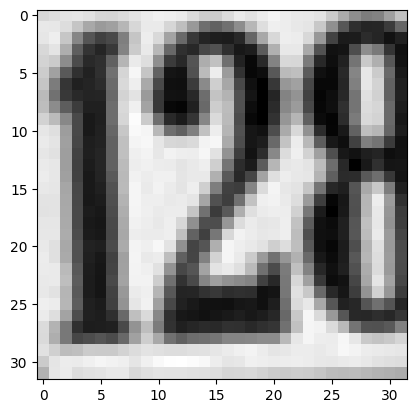

Label: 2


In [ ]:
#Checking the first image shape and pixels array
print('Looking at the first image and label in the training set'); print('--'*30) #visualize the firist image
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()
print('Label:', y_train_o[0])

Checking out first image and label of test data


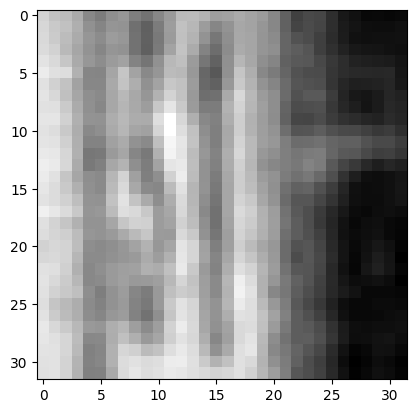

Label: 1


In [ ]:
#Checking first image of test data
print('Checking out first image and label of test data'); ('--'*30)
plt.imshow(X_test[0], cmap = plt.cm.binary)
plt.show()
print('Label:', y_test_o[0])

Let's realize that this may be a problem. We cannot make out the numbers clearly. We will need to address this later.

### **Normalize the train and the test data**

In [ ]:
#We need to normalize the train, test, and validation data and also reduce dimensionality or 'flatten' it to be able to work with Keras. It will need to be a 2D tensor to work. We have a 3D tensor currently.
#Start with reshaping and normalization
print('Reshaping the X data: (n, 32, 32) => (n, 1024)'); print('--'* 30)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

Reshaping the X data: (n, 32, 32) => (n, 1024)
------------------------------------------------------------


In [ ]:
#When we reshape, we do need to be sure we get float values so we can have accurate values later after the division takes place
print('Assuring we get float value type to allow decimal points after division'); print('--'*30)
X_train = X_train.astype('float32') #using float32 as type
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

Assuring we get float value type to allow decimal points after division
------------------------------------------------------------


In [ ]:
print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*30)
X_train /= 255
X_val /= 255
X_test /= 255
#Now we have reshaped and normalized the data

Normalizing the RGB codes by dividing it to the max RGB value
------------------------------------------------------------


Print the shapes of Training and Test data

In [ ]:
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

print('\n') #adding separation
print('y_train shape:', y_train_o.shape)
print('y_val shape:', y_val_o.shape)
print('y_test shape:', y_test_o.shape)

print('\n') #adding separation
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_val', X_val.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (42000, 1024)
X_val shape: (60000, 1024)
X_test shape: (18000, 1024)


y_train shape: (42000,)
y_val shape: (60000,)
y_test shape: (18000,)


Number of images in X_train 42000
Number of images in X_val 60000
Number of images in X_test 18000


Now, we have successfully flattened the data from 32*32 to a squared version of 1024 in size. This is now a 2D tensor able to be fed to Keras.

### **One-hot encode output**

In [ ]:
#When we one-hot encode, we are going to convert the y data into categorical form
print('One-hot encoding the y data'); print('--'*30)
y_train = to_categorical(y_train_o)
y_val = to_categorical(y_val_o)
y_test = to_categorical(y_test_o)

One-hot encoding the y data
------------------------------------------------------------


In [ ]:
#Now let's check data type
y_train.dtype
y_test.dtype
y_val.dtype

dtype('float32')

In [ ]:
#Now let's call the data to see what we have done
print('y Test Data:')
print(y_test)
print('--'*30)
print('y Train Data:')
print(y_train)
print('--'*30)
print('y Validation Data:')
print(y_val)
print('--'*30)

y Test Data:
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]
------------------------------------------------------------
y Train Data:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
------------------------------------------------------------
y Validation Data:
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
------------------------------------------------------------


**Observation:**


Note that now the data contains decimals and is in a range 0:1. It is binary! And we can build a model with this data.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
#using numpy to randomize
np.random.seed(42) #42 in homage to tradition. Let's see if it works.
import random
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
#let's start with importing anything needed. I think losses and optimizers work here.
from tensorflow.keras import losses
from tensorflow.keras import optimizers

In [ ]:
#Now, let's create our function for the specifications above
def nn_model_1():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(1024,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(10, activation='softmax')) #This fits our criteria in the text above for adding the layers
  #Next, let us add the optimizer Adam and set learning rate
  adam = optimizers.Adam(learning_rate= 0.001) #this rate is the recommended rate from Python and TF
  model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy']) #Now we have compiled the model according to specifications
  #let's return the model in a new variable
  return model


In [ ]:
model_one = nn_model_1() #new variable for model

In [ ]:
#now we print summary
model_one.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


From the summary, we see our shape for the layers 64, 32, 10, the number of parameters 65,600, 2080, and 330. We see the total parameters 68,010 is equal to the trainable parameters. We also see we have no non-trainable parameters.

In [ ]:
#Lastly, we are told to fit the model on the training data with a validation data split of 0.2, batch size = 128, verbose = 1, and epochs = 20.  And we need to store the model building history to use later for visualization.
history_model_one = model_one.fit(X_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=20)

Epoch 1/20
263/263 [==============================] - 3s 7ms/step - loss: 2.2911 - accuracy: 0.1247 - val_loss: 2.2364 - val_accuracy: 0.1589
Epoch 2/20
263/263 [==============================] - 2s 7ms/step - loss: 2.1265 - accuracy: 0.2261 - val_loss: 1.9530 - val_accuracy: 0.3081
Epoch 3/20
263/263 [==============================] - 2s 7ms/step - loss: 1.7912 - accuracy: 0.3792 - val_loss: 1.6654 - val_accuracy: 0.4305
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.6055 - accuracy: 0.4527 - val_loss: 1.5517 - val_accuracy: 0.4871
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4987 - accuracy: 0.5002 - val_loss: 1.4506 - val_accuracy: 0.5210
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4146 - accuracy: 0.5385 - val_loss: 1.3762 - val_accuracy: 0.5610
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.3568 - accuracy: 0.5648 - val_loss: 1.3215 - val_accuracy: 0.5830
Epoch 

Each epoch ran in a range of 1-3 seconds. Accuracy wavered between 0.65 and 0.11. Validation loss was between 2.27 and 1.15, and validation accuracy was between 0.64 and 0.15.

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [ ]:
#Let's make a dictionary of our history here and then look at the Training and Validation accuracies
histdict = history_model_one.history
#let's make a list of the 20 epochs now to and iterate
list_ep = [i for i in range(1, 21)]

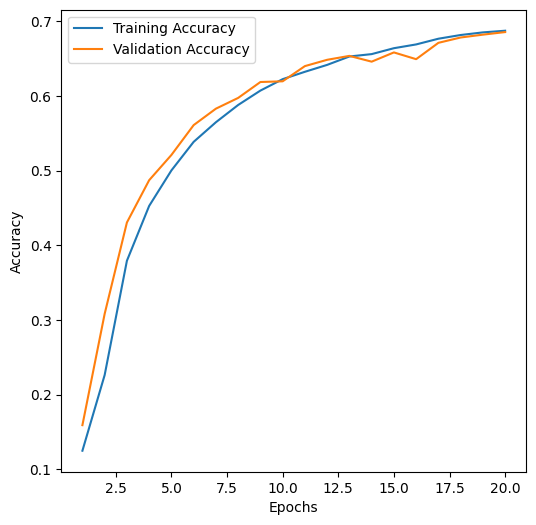

In [ ]:
#Now let's plot this data
plt.figure(figsize= (6, 6))
plt.plot(list_ep, histdict['accuracy'], label = 'Training Accuracy')
plt.plot(list_ep, histdict['val_accuracy'], label = 'Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


**Observations: We saw above that the training accuracy seems to improve with each epoch, and the validation accuracy is more volatile with each epoch.
The model is giving around ~62% accuracy at 20 epochs. At 20 epochs, the accuracy of the model on the training data as a whole is about 63% and the validation accuracy is ~62%.
Maximum accuracy for both train and validation data for 20 Epochs is 62% which is an alright performance rate.
The validation accuracy is closer to the training accuracy.

This model has a generalized performance. Sometimes the accuracy goes as high as ~69% with different epochs, but to generally, this 62 to 63% approximation is best to go off of when using it**

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
#import what I need from Keras. In this case, I have found backend is good to use.
from tensorflow.keras import backend

backend.clear_session()

In [ ]:
#Now we will fix the seed again at 42
np.random.seed(42)
import random
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
#let's start with importing losses and optimizers again and then the new layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers

def nn_model_2():
  model = Sequential()
  model.add(Dense(256, activation='relu', input_shape=(1024,)))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2)) #dropout layer
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax')) #This fits our criteria in the text above for adding the layers
  #Next, let us add the optimizer Adam and set learning rate
  adam = optimizers.Adam(learning_rate= 0.0005) #this rate is the recommended rate from Python and TF
  model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy']) #Now we have compiled the model according to specifications
  #let's return the model in a new variable
  return model

In [ ]:
model_two = nn_model_2()
model_two.summary() #saving model to a variable and getting summary again

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

Total params: 310,250
Trainable params: 310,186
Non-trainable params: 64
____________________________

In [ ]:
#Now we will fit the new model with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30. Store the model building history to use later for visualization.
history_model_two = model_two.fit(X_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Epoch 1/30
263/263 [==============================] - 6s 17ms/step - loss: 2.3580 - accuracy: 0.0988 - val_loss: 2.3083 - val_accuracy: 0.1051
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 2.3042 - accuracy: 0.1071 - val_loss: 2.2957 - val_accuracy: 0.1202
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 2.1574 - accuracy: 0.1810 - val_loss: 2.0680 - val_accuracy: 0.2590
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.8273 - accuracy: 0.3427 - val_loss: 1.6682 - val_accuracy: 0.4410
Epoch 5/30
263/263 [==============================] - 2s 9ms/step - loss: 1.5256 - accuracy: 0.4852 - val_loss: 1.3882 - val_accuracy: 0.5338
Epoch 6/30
263/263 [==============================] - 4s 16ms/step - loss: 1.3376 - accuracy: 0.5538 - val_loss: 1.2510 - val_accuracy: 0.5867
Epoch 7/30
263/263 [==============================] - 3s 12ms/step - loss: 1.2436 - accuracy: 0.5908 - val_loss: 1.1652 - val_accuracy: 0.6179
E

### **Plot the Training and Validation Accuracies and write down your Observations.**

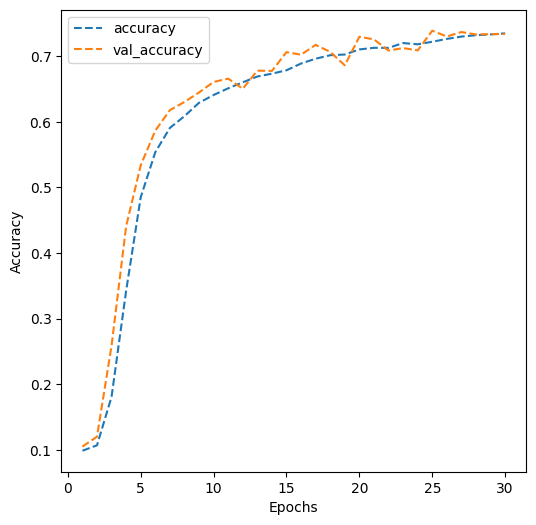

In [ ]:
#Doing it all again baby
histdict2 = history_model_two.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (6,6))
plt.plot(list_ep,histdict2['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,histdict2['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:OKAY, so..it's not great. BUT, it is better. We should work to keep improving the model.
I notice immediately, that the accuracy is better than the first model. The increase in accuracy is quicker this time as well. We jump from ~10% accuracy on the first 3-4 epochs to ~65% accuracy within the fitst 8-10 epochs for both accuracy and validation accuracy. There is continued volatility in validation accuracy, but it is less extreme in this model compared to the fist model. Overall, this is a large improvement with ~73% or ~75% accuracy generally speaking**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
predictions_test = model_two.predict(X_test) #prediction
predictions_test = np.argmax(predictions_test, axis=1) #find max values along axis 1 of predictions


563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
#converting one-hot encoded vectors to single label. Use argmax for this too but axis is -1.
y_test = np.argmax(y_test, axis= -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [ ]:
#Let's import what we need to do this work
from sklearn.metrics import classification_report #classification report
from sklearn.metrics import confusion_matrix #confusion matrix

#Next, let us print the report
print(classification_report(y_test, predictions_test))


              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1814
           1       0.70      0.79      0.74      1828
           2       0.80      0.75      0.77      1803
           3       0.71      0.69      0.70      1719
           4       0.69      0.82      0.75      1812
           5       0.71      0.63      0.67      1768
           6       0.75      0.71      0.73      1832
           7       0.77      0.78      0.78      1808
           8       0.68      0.72      0.70      1812
           9       0.76      0.67      0.71      1804

    accuracy                           0.73     18000
   macro avg       0.73      0.73      0.73     18000
weighted avg       0.73      0.73      0.73     18000



In [ ]:
#Now bring in the confusion matrix using predicted labels and our actual labels
confusionm = confusion_matrix(y_test, predictions_test)


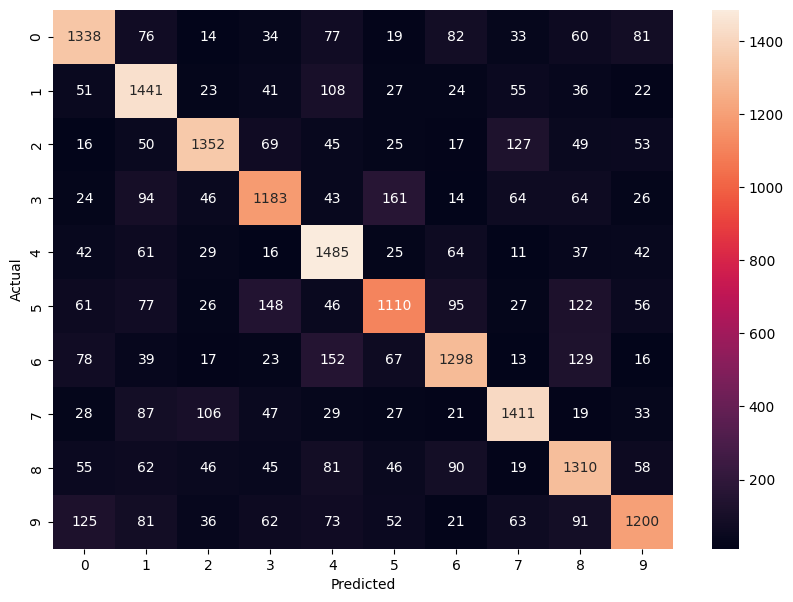

In [ ]:
#Finally, let's plot it to get observations.
plt.figure(figsize=(10,7))
sns.heatmap(confusionm, annot=True, fmt='.0f') #use heatmap because we are looking at a matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Observations: The model is offering ~76% accuracy on the test data according to this report. The recall range is high. If you remove outliers, it is ~72% to ~83% (low ~67%, high ~83%).
So this tells us the model identifies some objects very well such as object 4, but it is not quite there with our 'outliers' objects 3 and 8. But generally, the model can distinguish items fairly well.

In [ ]:
from tensorflow.keras import backend #clearing session
backend.clear_session()

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
#This should go more quickly, since we have done this all before.
#Load it all back in!

#importing all packages I need or may need for the work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import tensorflow as tf
import keras
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    auc,
)
#import what I need from TF and Keras
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization)
from tensorflow.keras.layers import (Activation, Dense)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#I will assign the file to a variable for easier access and load it
h5data2 = ('/content/drive/MyDrive/Deep Learning/SVHN_single_grey1.h5')
h5data2 = h5py.File(h5data2, 'r') #reading file
#let's load the keys of the dataset
h5data2.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
X_train = h5data2['X_train'][:]
y_train = h5data2['y_train'][:]
X_test = h5data2['X_test'][:]
y_test = h5data2['y_test'][:]


# Close this file
h5data2.close()

Check the number of images in the training and the testing dataset.

In [ ]:
#Let's try and simplify what we did last time by just going step by step. Let's get the length.
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

42000
18000
42000
18000


**Observation: We got 42,000 images in the training data and 18,000 images in the test data**

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
#Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)


Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

Print New shape of Training and Test

In [ ]:
#New shape!

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
#When we one-hot encode, we are going to convert the y data into categorical form
print('One-hot encoding the y data'); print('--'*30)
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

#test it out to see if it worked
y_test

One-hot encoding the y data
------------------------------------------------------------


array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

Observation: y_test is now a one-hot encoded vector not just a single label at each entry

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
#Let's set the seed again at 42
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
#Importing our old friends losses and optimizers and other modules we need
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import (Conv2D, LeakyReLU, MaxPool2D, Flatten, Dense) #add modules I needed

In [ ]:

#Define the function
def cnn_model_1():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(10, activation='softmax'))
    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.001)

    #compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=adam,
        metrics=['accuracy']
    )

    return model

In [ ]:
model_1 = cnn_model_1() #variable for model
model_1.summary() #summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [ ]:
#History now and fitting the model to 20 epochs
history_model_1 = model_1.fit(
            X_train, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            batch_size = 32,
            verbose=1)

Epoch 1/20
1050/1050 [==============================] - 64s 60ms/step - loss: 1.1274 - accuracy: 0.6303 - val_loss: 0.6497 - val_accuracy: 0.8087
Epoch 2/20
1050/1050 [==============================] - 67s 64ms/step - loss: 0.5352 - accuracy: 0.8475 - val_loss: 0.5254 - val_accuracy: 0.8448
Epoch 3/20
1050/1050 [==============================] - 62s 59ms/step - loss: 0.4416 - accuracy: 0.8700 - val_loss: 0.5049 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 60s 57ms/step - loss: 0.3781 - accuracy: 0.8888 - val_loss: 0.4486 - val_accuracy: 0.8739
Epoch 5/20
1050/1050 [==============================] - 62s 59ms/step - loss: 0.3330 - accuracy: 0.9004 - val_loss: 0.4592 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 62s 59ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.4640 - val_accuracy: 0.8735
Epoch 7/20
1050/1050 [==============================] - 62s 59ms/step - loss: 0.2622 - accuracy: 0.9216 - val_loss: 0.4506 -

### **Plot the Training and Validation Accuracies and Write your observations.**

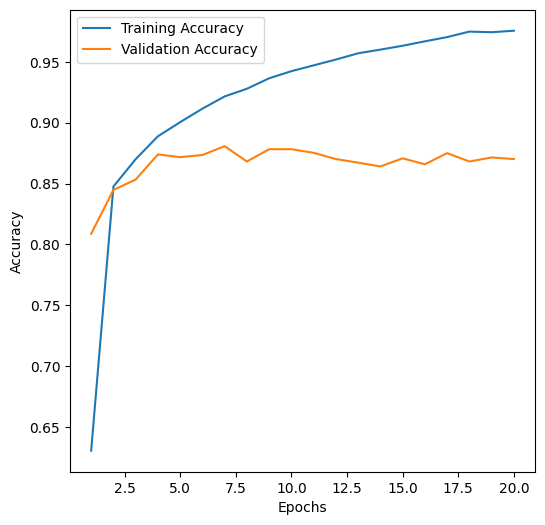

In [ ]:
#dictionary again
histdictcnn = history_model_1.history
list_ep = [i for i in range(1, 21)]

plt.figure(figsize=(6,6))
plt.plot(list_ep, histdictcnn['accuracy'], label = 'Training Accuracy')
plt.plot(list_ep, histdictcnn['val_accuracy'], label = 'Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

**Observations: the model has done poorly on the validation data. The model appears to be overfitting the training data.
The validation accuracy becomes somewhat constant after the first two epochs.
But the incresing rate of accuracy is lower after 2 epochs.**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
#We repeat our steps above with backend
from tensorflow.keras import backend
backend.clear_session()

#fix seed again
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
#Define the function again!! Round two
def cnn_model_2():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.001)

    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [ ]:
#now build that model a
model_2 = cnn_model_2()
#summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                     

In [ ]:
#fit the model again and save the history
history_model_2 = model_two.fit(
    X_train,y_train_encoded,
    epochs=30,
    validation_split=0.2,
    batch_size = 128,
    verbose=1)

Epoch 1/30
263/263 [==============================] - 115s 438ms/step - loss: 0.5102 - accuracy: 0.8442 - val_loss: 0.4253 - val_accuracy: 0.8782
Epoch 2/30
263/263 [==============================] - 108s 410ms/step - loss: 0.4612 - accuracy: 0.8612 - val_loss: 0.4103 - val_accuracy: 0.8851
Epoch 3/30
263/263 [==============================] - 106s 405ms/step - loss: 0.4186 - accuracy: 0.8729 - val_loss: 0.4160 - val_accuracy: 0.8900
Epoch 4/30
263/263 [==============================] - 110s 417ms/step - loss: 0.3926 - accuracy: 0.8791 - val_loss: 0.3877 - val_accuracy: 0.8907
Epoch 5/30
263/263 [==============================] - 104s 394ms/step - loss: 0.3603 - accuracy: 0.8885 - val_loss: 0.4146 - val_accuracy: 0.8811
Epoch 6/30
263/263 [==============================] - 104s 397ms/step - loss: 0.3394 - accuracy: 0.8962 - val_loss: 0.3898 - val_accuracy: 0.8907
Epoch 7/30
263/263 [==============================] - 104s 395ms/step - loss: 0.3201 - accuracy: 0.8993 - val_loss: 0.3709 -

### **Plot the Training and Validation accuracies and write your observations.**

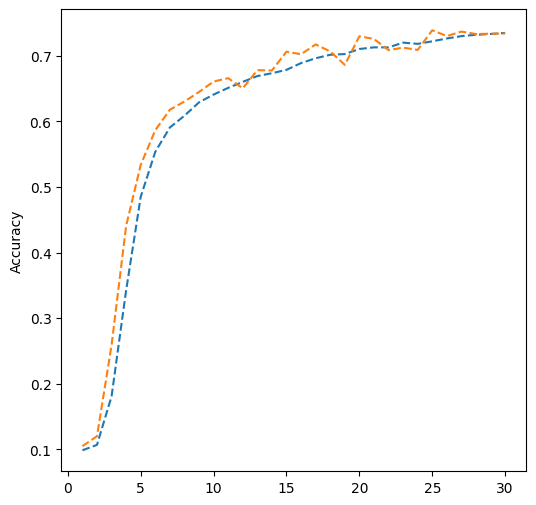

In [ ]:
#Another new dictionary
histdictcnn2 = history_model_two.history
list_ep = [i for i in range(1,31)]

#plot the model again
plt.figure(figsize=(6,6))
plt.plot(list_ep,histdictcnn2['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,histdictcnn2['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.show()

**Observations:The second model has dropout layers, and they seem to have reduced the overfitting as compared to the previous model. The validation deata accuracy is ~5% lower than the training data accuracy now.
The accuracy in this model is better than the 1st model overall.The Training accuracy does increase with the increase in epochs. It rapidly increases up to around 5 epochs, but then it seems to have a very lower increase going on.
The validation accuracy is volatile still, but overall it is also increasing with the increase in epochs. Just like the training data accuracy, validation accuracy also has a rapid increase up to around 2 epochs and then has lower increase. It appears close to constant.
The model is giving around ~90% accuracy at 30 epochs. At 30 epochs, the accuracy of the model on the training data is about 94% and the validation accuracy is ~90%.
The validation accuracy and training accuracy still have ~5% difference.**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
#Make prediction on the test data using model_2
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

563/563 [==============================] - 21s 37ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
#We now will change each entry back to a single label from a one-hot encoded vector that we created before
y_test = np.argmax(y_test_encoded, axis=-1)

In [ ]:
y_test.shape

(18000,)

### **Write your final observations on the performance of the model on the test data.**

In [ ]:
#To get our final observations, we need to run the classificaition report and add the confusion matrix again to look at everything in greater detail
#importing required functions (even though we have these at the start. I want them here for clarity)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1814
           1       0.13      0.00      0.00      1828
           2       0.00      0.00      0.00      1803
           3       0.00      0.00      0.00      1719
           4       0.00      0.00      0.00      1812
           5       0.06      0.00      0.00      1768
           6       0.00      0.00      0.00      1832
           7       0.08      0.06      0.07      1808
           8       0.00      0.00      0.00      1812
           9       0.10      0.92      0.18      1804

    accuracy                           0.10     18000
   macro avg       0.04      0.10      0.03     18000
weighted avg       0.04      0.10      0.03     18000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


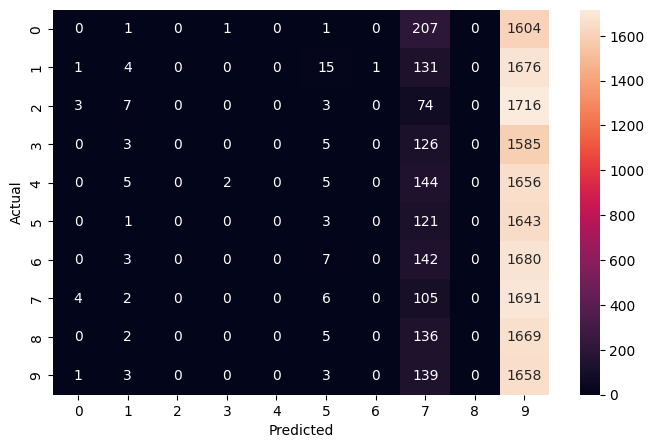

In [ ]:
#heatmap again is being used to plot the confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:The model is giving ~91% accuracy on the test data which is comparable to the accuracy of the validation data. This can lead us to believe that the model is giving a generalized performance again here.
The recall in this model again has a very high range (88-94)% which implies that the model is pretty good at identifying most of the objects.
The model is able to identify ~94% of image 0 but can only identify only ~88% of image 3 and 8.  These were the two images that were a problem in the last ANN model too. Perhaps we remove them?

Here also, the lowest image classes 0 and 8 have the lowest accuracy. The model needs improvements in order to distinguish between 3 and 8.
Overall the model could distiguish individual digits well.
Also, the overall accuracy and the recall values tell us we can say that this CNN works better than the ANN when identifying digits in the images.**